# Import libraries

In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import copy
import squarify as sq
from matplotlib.ticker import PercentFormatter
#from fim import arules
from operator import attrgetter
import matplotlib.colors as mcolors
warnings.filterwarnings("ignore")
import matplotlib.ticker as tkr

pd.set_option('display.max_columns', None)
#Use fivethirtyeight style
plt.style.use('fivethirtyeight')

#Cancel any style and reset matplotlib styles
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

# Importing the data set

In [2]:
df=pd.read_csv('listings.csv',low_memory=False)

In [3]:
df_reviews = pd.read_csv('reviews-2.csv',low_memory=False)

In [4]:
df_reviews.head()

listing_id        id        date  reviewer_id reviewer_name  \
0       10595    271535  2011-05-20       189305        Pamela   
1       10595   1994237  2012-08-15       289831        Andrey   
2       10595   4678609  2013-05-20      2635427         Ahmet   
3       10595  12502994  2014-05-04      2422327          Hema   
4       10595  19482948  2014-09-13      6737784       Mariana   

                                            comments  
0  The apartment was wonderful, fully equiped, be...  
1  Emmanouil was an excellent host. He provided u...  
2  Manos is a very good host, he is kind and help...  
3  Our stay in Emmanouil home was comfortable, qu...  
4  Fantastic accommodation very well located to v...

### Saving a copy to use for folium at the end

In [5]:
df_map= df.copy()

# Cleaning the dataFrames

In [6]:
reviews = ['listing_id','id','reviewer_id','date']
df_reviews = df_reviews[reviews]
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536698 entries, 0 to 536697
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   listing_id   536698 non-null  int64 
 1   id           536698 non-null  int64 
 2   reviewer_id  536698 non-null  int64 
 3   date         536698 non-null  object
dtypes: int64(3), object(1)
memory usage: 16.4+ MB


### Renaming as to merge the datasets

In [7]:


original = ['id','neighbourhood_cleansed']
df= df[original]
df.rename(columns={'id':'listing_id'},inplace=True)
#rankings_pd.rename(columns = {'test':'TEST'}, inplace = True)

In [8]:
#df.sort_values('listing_id', ascending=False)

In [9]:
#df_reviews.sort_values('id', ascending=False)

In [10]:
#Left merging as to keep all the reviews numbers

df_merged= df_reviews.merge(df,how='left',on='listing_id')

In [11]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536698 entries, 0 to 536697
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   listing_id              536698 non-null  int64 
 1   id                      536698 non-null  int64 
 2   reviewer_id             536698 non-null  int64 
 3   date                    536698 non-null  object
 4   neighbourhood_cleansed  536698 non-null  object
dtypes: int64(3), object(2)
memory usage: 24.6+ MB


In [12]:
df_merged.drop(['id','reviewer_id'], axis=1, inplace=True)
df_merged

listing_id        date    neighbourhood_cleansed
0                    10595  2011-05-20               ΑΜΠΕΛΟΚΗΠΟΙ
1                    10595  2012-08-15               ΑΜΠΕΛΟΚΗΠΟΙ
2                    10595  2013-05-20               ΑΜΠΕΛΟΚΗΠΟΙ
3                    10595  2014-05-04               ΑΜΠΕΛΟΚΗΠΟΙ
4                    10595  2014-09-13               ΑΜΠΕΛΟΚΗΠΟΙ
...                    ...         ...                       ...
536693  714966064913905157  2022-09-18                     ΓΟΥΔΙ
536694  714966064913905157  2022-09-20                     ΓΟΥΔΙ
536695  715001191350688368  2022-09-18  ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ
536696  715001191350688368  2022-09-20  ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ
536697  715901182678383578  2022-09-16                   ΝΙΡΒΑΝΑ

[536698 rows x 3 columns]

## Fixing variables types

In [13]:
df_merged['date'] = pd.to_datetime(df_merged["date"])
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536698 entries, 0 to 536697
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   listing_id              536698 non-null  int64         
 1   date                    536698 non-null  datetime64[ns]
 2   neighbourhood_cleansed  536698 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 16.4+ MB


In [14]:
#df_merged.head()

In [15]:
df_merged['month'] = df_merged['date'].dt.month
df_merged['year'] = df_merged['date'].dt.year

In [16]:
df_merged.drop(['date'], axis=1, inplace=True)
df_merged.sort_values(by='year',ascending=False)

listing_id            neighbourhood_cleansed  month  year
536697  715901182678383578                           ΝΙΡΒΑΝΑ      9  2022
144444            16698464          ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ      7  2022
144446            16698464          ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ      8  2022
144447            16698464          ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ      8  2022
144448            16698464          ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ      8  2022
...                    ...                               ...    ...   ...
1740                 59663  ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ      6  2011
1739                 59663  ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ      6  2011
1688                 59663  ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     12  2010
1687                 59663  ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     12  2010
265                  10995                       ΑΜΠΕΛΟΚΗΠΟΙ      7  2010

[536698 rows x 4 columns]

In [32]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536698 entries, 0 to 536697
Data columns (total 4 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   listing_id              536698 non-null  int64 
 1   neighbourhood_cleansed  536698 non-null  object
 2   month                   536698 non-null  int64 
 3   year                    536698 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 20.5+ MB


### Saving DataFrame for powerBI

In [34]:
#df_merged.to_csv('seasonality.csv', encoding='utf-8')

## Get an indication of the seasonality

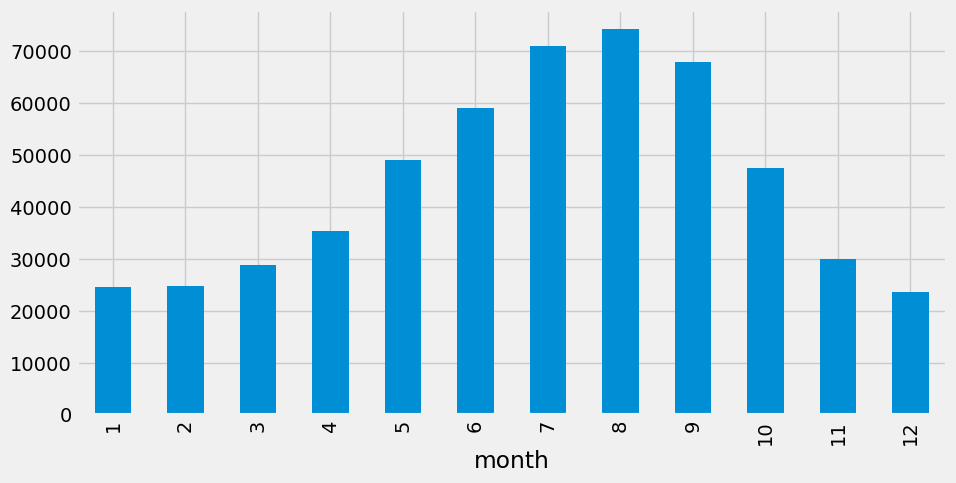

In [18]:
df_merged.groupby(by='month')['listing_id'].count().plot.bar()
df8=df_merged.groupby(by='month')['listing_id'].count().reset_index()

# Ploting with seaborn the seasonality on the colors of the presentation

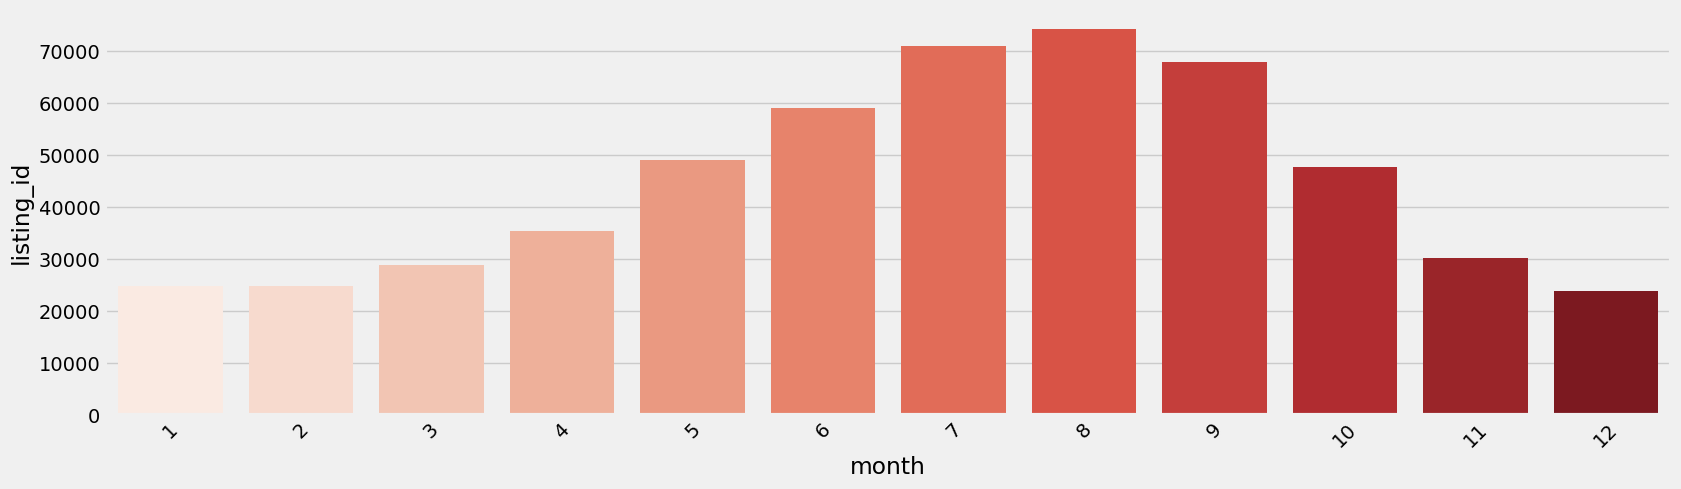

In [19]:
plt.figure(figsize=(18,5))
ax = sns.barplot(x='month', y = 'listing_id',palette = "Reds", data=df8)
plt.setp(ax.get_xticklabels(), rotation=45)
None

## Further Exploring

In [20]:
df_merged['neighbourhood_cleansed'].unique()

array(['ΑΜΠΕΛΟΚΗΠΟΙ', 'ΑΚΡΟΠΟΛΗ', 'ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ', 'ΠΑΓΚΡΑΤΙ',
       'ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ', 'ΠΕΝΤΑΓΩΝΟ', 'ΠΕΤΡΑΛΩΝΑ',
       'ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ', 'ΝΙΡΒΑΝΑ', 'ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ',
       'ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ', 'ΣΤΑΔΙΟ', 'ΝΕΑ ΚΥΨΕΛΗ', 'ΚΟΛΩΝΑΚΙ',
       'ΑΝΩ ΠΑΤΗΣΙΑ', 'ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ', 'ΙΛΙΣΙΑ', 'ΚΥΨΕΛΗ',
       'ΝΕΟΣ ΚΟΣΜΟΣ', 'ΚΕΡΑΜΕΙΚΟΣ', 'ΘΗΣΕΙΟ', 'ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ',
       'ΠΕΔΙΟ ΑΡΕΩΣ', 'ΓΟΥΒΑ', 'ΖΑΠΠΕΙΟ', '1Ο ΝΕΚΡΟΤΑΦΕΙΟ', 'ΠΡΟΜΠΟΝΑ',
       'ΓΟΥΔΙ', 'ΓΚΑΖΙ', 'ΚΟΛΩΝΟΣ', 'ΓΚΥΖΗ', 'ΒΟΤΑΝΙΚΟΣ', 'ΛΥΚΑΒΗΤΤΟΣ',
       'ΑΝΩ ΚΥΨΕΛΗ', 'ΠΑΤΗΣΙΑ', 'ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ', 'ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ',
       'ΠΟΛΥΓΩΝΟ', 'ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ', 'ΕΛΛΗΝΟΡΩΣΩΝ', 'ΡΗΓΙΛΛΗΣ',
       'ΚΟΛΟΚΥΝΘΟΥ', 'ΣΕΠΟΛΙΑ', 'ΡΙΖΟΥΠΟΛΗ', 'ΡΟΥΦ'], dtype=object)

In [21]:
#df_merged2=df_merged[(df_merged['neighbourhood_cleansed']==['ΖΑΠΠΕΙΟ']) | (df_merged['neighbourhood_cleansed']==['ΑΚΡΟΠΟΛΗ']) | (df_merged['neighbourhood_cleansed']==['ΚΟΛΩΝΑΚΙ']) | (df_merged['neighbourhood_cleansed']==['1Ο ΝΕΚΡΟΤΑΦΕΙΟ']) | (df_merged['neighbourhood_cleansed']==['ΘΗΣΕΙΟ'])]

# Best neighbourhoods based on the other dataset analysis
x= ['ΖΑΠΠΕΙΟ','ΑΚΡΟΠΟΛΗ','ΚΟΛΩΝΑΚΙ','1Ο ΝΕΚΡΟΤΑΦΕΙΟ','ΘΗΣΕΙΟ']
df_merged2=df_merged[(df_merged['neighbourhood_cleansed'].isin(x))] 
df9=df_merged2.groupby(by='month')['listing_id'].count().reset_index()

## ploting for the most promising neighbourhoods

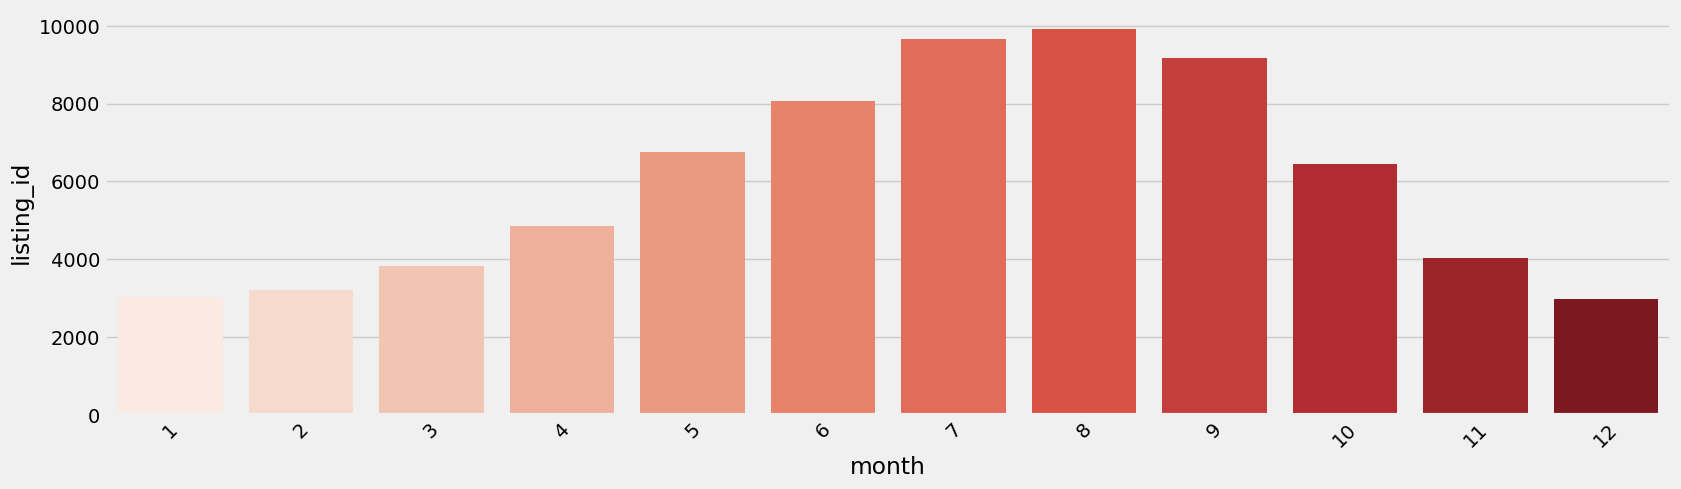

In [22]:
plt.figure(figsize=(18,5))
ax = sns.barplot(x='month', y = 'listing_id',palette = "Reds", data=df9)
plt.setp(ax.get_xticklabels(), rotation=45)
None

# Ploting by year to see the number of listings 

In [23]:
df_merged2013 = df_merged[df_merged['year']==2013]
#df_merged2013

In [24]:
df10=df_merged2.groupby(by='year')['listing_id'].count().reset_index()
#df10

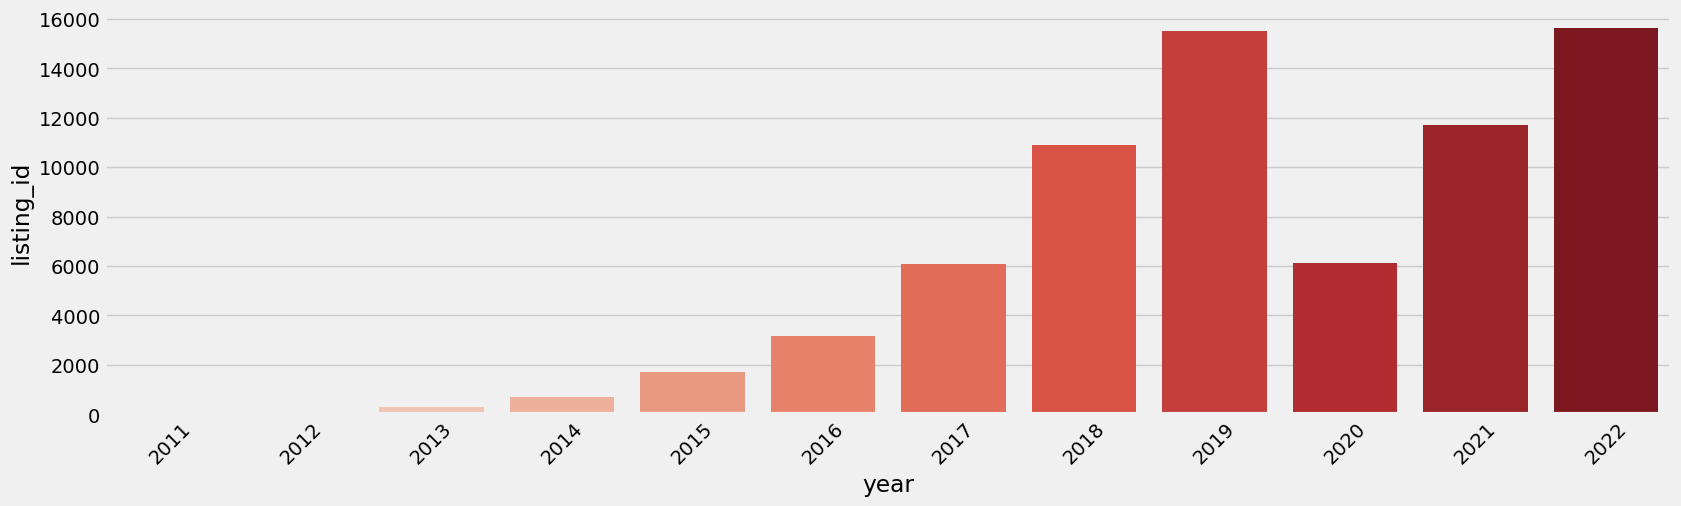

In [25]:
plt.figure(figsize=(18,5))
ax = sns.barplot(x='year', y = 'listing_id',palette = "Reds", data=df10)
plt.setp(ax.get_xticklabels(), rotation=45)
None

In [26]:
#df_map.head()

# Maping with folium the Airbnb listings in Athens

### Libraries for folium

In [27]:
import folium
from folium import plugins
from folium.plugins import HeatMap

### Heatmap

In [37]:
map_hooray = folium.Map(location=[df_map['latitude'].mean(), df_map['longitude'].mean()],
                    zoom_start = 13)
#map_hooray
heat_data=[[row['latitude'],row['longitude']] for index,row in df_map.iterrows()]
HeatMap(heat_data).add_to(map_hooray)

location_map = map_hooray
map_hooray

### Map with marks on every house listing

In [39]:
map_hooray = folium.Map(location=[df_map['latitude'].mean(), df_map['longitude'].mean()],
                    zoom_start = 13)
#map_hooray
# add marker one by one on the map
for i in range(0,len(df_map)):
    folium.Marker(
      location=[df_map.iloc[i]['latitude'], df_map.iloc[i]['longitude']],
      popup=df_map.iloc[i]['id'],
   ).add_to(map_hooray)
    
#map_hooray

# Folium Map with Markers

In [40]:
locations = list(zip(df_map.latitude, df_map.longitude))
map_hooray = folium.Map(location=[df_map['latitude'].mean(), df_map['longitude'].mean()],
                    zoom_start = 13)
for i in range(len(df_map)):
    folium.CircleMarker(location=locations[i],radius=1).add_to(map_hooray)
map_hooray